In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 25
img_height, img_width = 256, 256
input_shape = (img_height, img_width, 3)


def create_data_sparse():
    # data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, width_shift_range=0.2,
    #                               height_shift_range=0.2, zoom_range=0.2)
    data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

    train_images = data_gen.flow_from_directory('Dataset/PandasBears/Train', 
                                                target_size=(img_height, img_width),
                                                class_mode='binary', 
                                                batch_size=batch_size, 
                                                subset='training', 
                                                # color_mode='rgb'
                                                )
    
    
    test_images = data_gen.flow_from_directory('Dataset/PandasBears/Test', 
                                               target_size=(img_height, img_width),
                                               class_mode='binary', 
                                               batch_size=batch_size, 
                                               shuffle=False, 
                                            #    color_mode='rgb'
                                               )

    return train_images, test_images

train_images, test_images = create_data_sparse()

labels = ['bear', 'panda']



Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


(256, 256, 3)


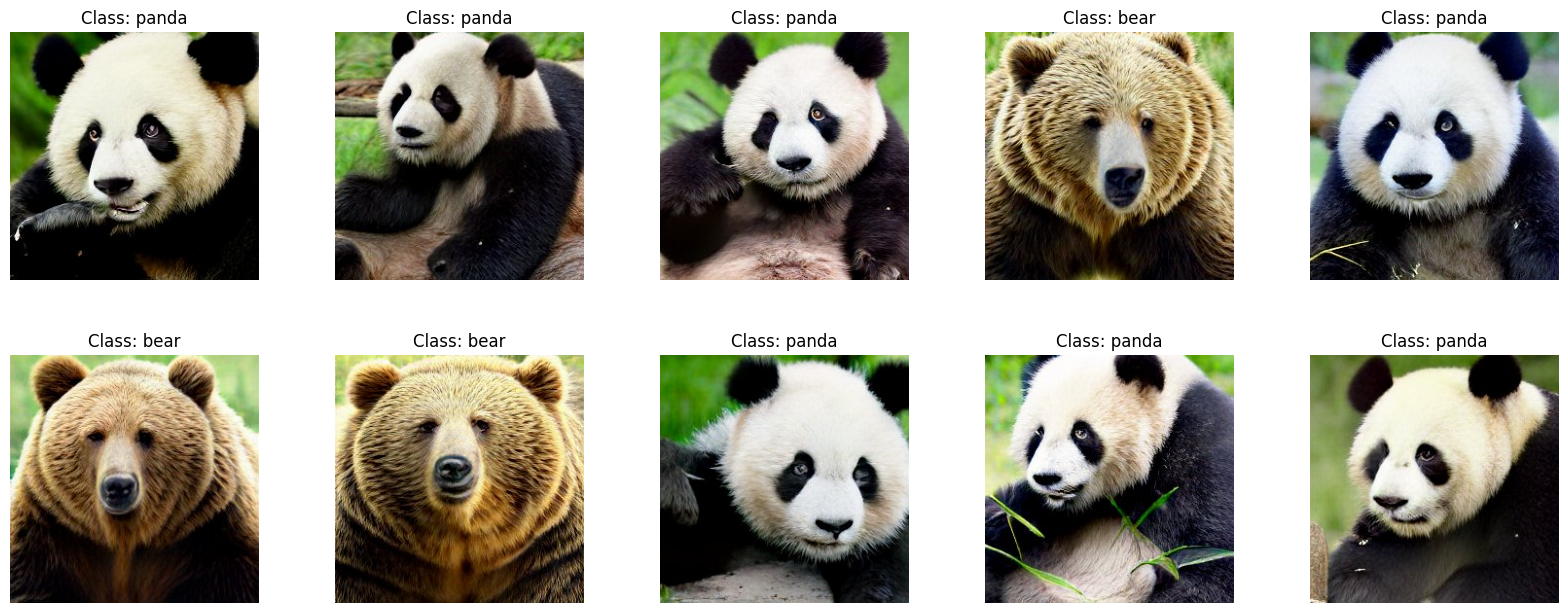

In [18]:

samples = next(train_images)
# print(samples[0]);

images = samples[0]
target = samples[1]
print(images[0].shape)
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')


In [43]:
import numpy as np
import Convolution

input_size = (32, 32, 3)
# print(input_size[2])
input_data = np.random.randn(*input_size)

filter = [np.random.randn(*input_size) for _ in range(3)]

print(filter)
# images[0].shape[2]
# padding_size=1
# if padding_size > 0:
#     print("masuk")
#     padded_input = np.pad(input_data, ((padding_size, padding_size), (padding_size, padding_size), (0, 0)), mode='constant')
# else:
#     padded_input = input_data

# print(padded_input )
# # print('--')
# # print(input_data[0])

[array([[[ 6.07087797e-01,  1.31830140e+00, -2.17660942e+00],
        [-5.60006274e-01,  9.02428976e-01, -7.05734628e-01],
        [-8.62621889e-01, -5.88355138e-02, -4.94827751e-01],
        ...,
        [ 1.18152859e+00, -1.27319170e+00, -1.51384386e-01],
        [ 3.91866467e-01, -6.91769365e-01, -1.13461612e+00],
        [-5.91402933e-01,  6.53499707e-01, -1.42480945e+00]],

       [[-1.99574886e-01,  1.17748199e+00,  1.56720908e+00],
        [-1.49343074e-01,  3.38845382e-01, -1.23289993e+00],
        [ 2.07335941e+00,  5.56921105e-02,  1.05529416e+00],
        ...,
        [-6.82491338e-02, -1.49701588e-01,  4.36135196e-02],
        [-4.11646072e-01, -9.79698419e-01, -7.94265539e-01],
        [-1.35213506e+00, -2.82076692e-01, -6.50315005e-01]],

       [[-7.26272667e-01,  2.61644548e-01, -1.41714462e+00],
        [ 8.37580077e-01,  3.12297179e+00, -6.10547288e-01],
        [ 4.36417767e-01, -1.19370456e+00, -1.01304777e+00],
        ...,
        [-2.72167394e-02,  4.50963123e-01

In [21]:
import numpy as np

class Convolution:
    
    # TODO: diferent width / height
    def __init__(self, input_size, padding_size, filter_size, num_filters, stride, biases):
        self.input_size = input_size
        self.padding_size = padding_size
        self.filter_size = filter_size

        self.num_filters = num_filters
        self.stride = stride
        self.biases = biases

        self.output_size = (((input_size[0] - filter_size[0] + 2 * padding_size) // stride ) + 1, ((input_size[1] - filter_size[1] + 2 * padding_size) // stride ) + 1)


    def forward(self, input):

        # init random filter
        self.filter = [np.random.randn(self.filter_size[0], self.filter_size[1], input.shape[2]) for _ in range(self.num_filters)]

        # Menambahkan padding jika diperlukan
        if self.padding_size > 0:
            padded_input = np.pad(input, ((self.padding_size, self.padding_size), (self.padding_size, self.padding_size), (0, 0)), mode='constant')
        else:
            padded_input = input

        # init input
        self.output = np.zeros((self.output_size[0], self.output_size[1], self.num_filters))

        for i in range(0,self.input_size[0] - self.filter_size[0] + (2 * self.padding_size) + 1, self.stride):
            for j in range(0, self.input_size[1] - self.filter_size[1] + (2 * self.padding_size) + 1,self.stride):
                for n in range(self.num_filters):
                    # Mengambil bagian input yang sesuai dengan ukuran filter
                    input_patch = padded_input[i:i+self.filter_size[0], j:j+self.filter_size[1]]
                    # Melakukan operasi konvolusi
                    self.output[i//self.stride][j//self.stride][n] = np.sum(input_patch * self.filter[n])

        return self.output



In [23]:
import numpy as np
input_size = (4, 4, 1)
input_data = np.random.randn(*input_size)

# input_data =np.array(
#     [[[252], [251], [246], [207], [90]],
#     [[250], [242], [236], [144], [41]],
#     [[252], [244], [228], [102], [43]],
#     [[250], [243], [214], [59], [52]],
#     [[248], [243], [201], [44], [54]],]
# )

conv_layer = Convolution(input_size=(5, 5), padding_size=0, filter_size=(3, 3), num_filters=1, stride=1, biases=0)

output = conv_layer.forward(input_data)

print(output)

[[[ 44.]
  [284.]
  [536.]]

 [[ 74.]
  [424.]
  [542.]]

 [[107.]
  [525.]
  [494.]]]
